In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv('/home/thenielfarias/train.csv')
test_set = pd.read_csv('/home/thenielfarias/test.csv')

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_set.describe(exclude = ['int', 'float'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [5]:
train_set.describe(exclude = ['object'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


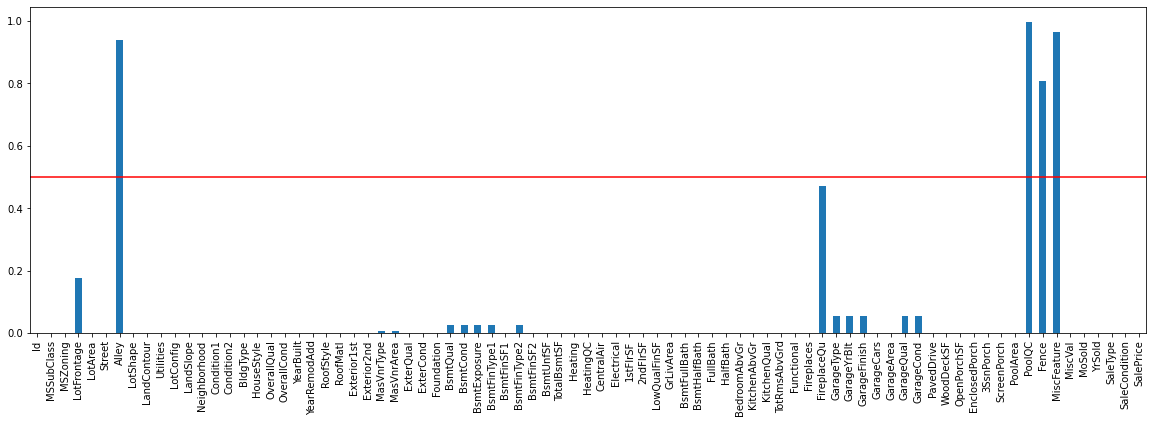

In [6]:
plt.figure(figsize = (20, 6))
missings = train_set.isnull().sum() / len(train_set)
missings.plot.bar()
plt.axhline(0.5, color = 'r')
plt.show()

In [7]:
# split data into categorical and numerical features

numerical_features = [col for col in train_set.columns if train_set[col].dtype != 'object']
categorical_features = [col for col in train_set.columns if train_set[col].dtype == 'object']

In [8]:
# check normality of sales price

import scipy.stats

from scipy.stats import shapiro

def check_normality(data):
    stat, p = shapiro(data)
    print("Statistic = %.2f, P-Value = %.2f" % (stat, p))
    if p > 0.05:
        print("Normal Distribution")
    else:
        print("Not Normal")
        
check_normality(train_set["SalePrice"])

Statistic = 0.87, P-Value = 0.00
Not Normal


/home/thenielfarias/.local/share/virtualenvs/thenielfarias-orcZKmpx/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


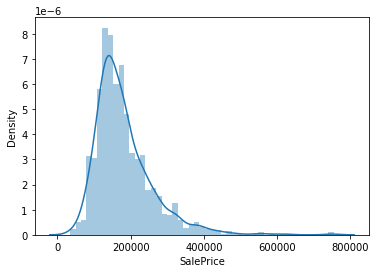

In [9]:
import seaborn as sns

sns.distplot(train_set['SalePrice'])
plt.show()

/home/thenielfarias/.local/share/virtualenvs/thenielfarias-orcZKmpx/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


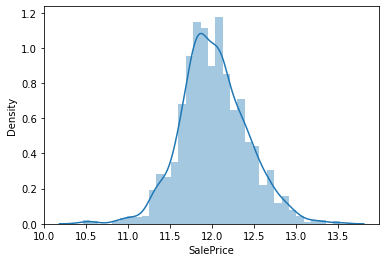

In [10]:
# apply log transformation

sns.distplot(np.log1p(train_set['SalePrice']))
plt.show()

In [11]:
# check normality of each numerical variable

for col in train_set[numerical_features].columns:
    print(f"shapiro-wilk test for {col}")
    check_normality(train_set[col])
    print("---------------------------------")

shapiro-wilk test for Id
Statistic = 0.95, P-Value = 0.00
Not Normal
---------------------------------
shapiro-wilk test for MSSubClass
Statistic = 0.80, P-Value = 0.00
Not Normal
---------------------------------
shapiro-wilk test for LotFrontage
Statistic = nan, P-Value = 1.00
Normal Distribution
---------------------------------
shapiro-wilk test for LotArea
Statistic = 0.35, P-Value = 0.00
Not Normal
---------------------------------
shapiro-wilk test for OverallQual
Statistic = 0.95, P-Value = 0.00
Not Normal
---------------------------------
shapiro-wilk test for OverallCond
Statistic = 0.83, P-Value = 0.00
Not Normal
---------------------------------
shapiro-wilk test for YearBuilt
Statistic = 0.93, P-Value = 0.00
Not Normal
---------------------------------
shapiro-wilk test for YearRemodAdd
Statistic = 0.86, P-Value = 0.00
Not Normal
---------------------------------
shapiro-wilk test for MasVnrArea
Statistic = nan, P-Value = 1.00
Normal Distribution
--------------------------

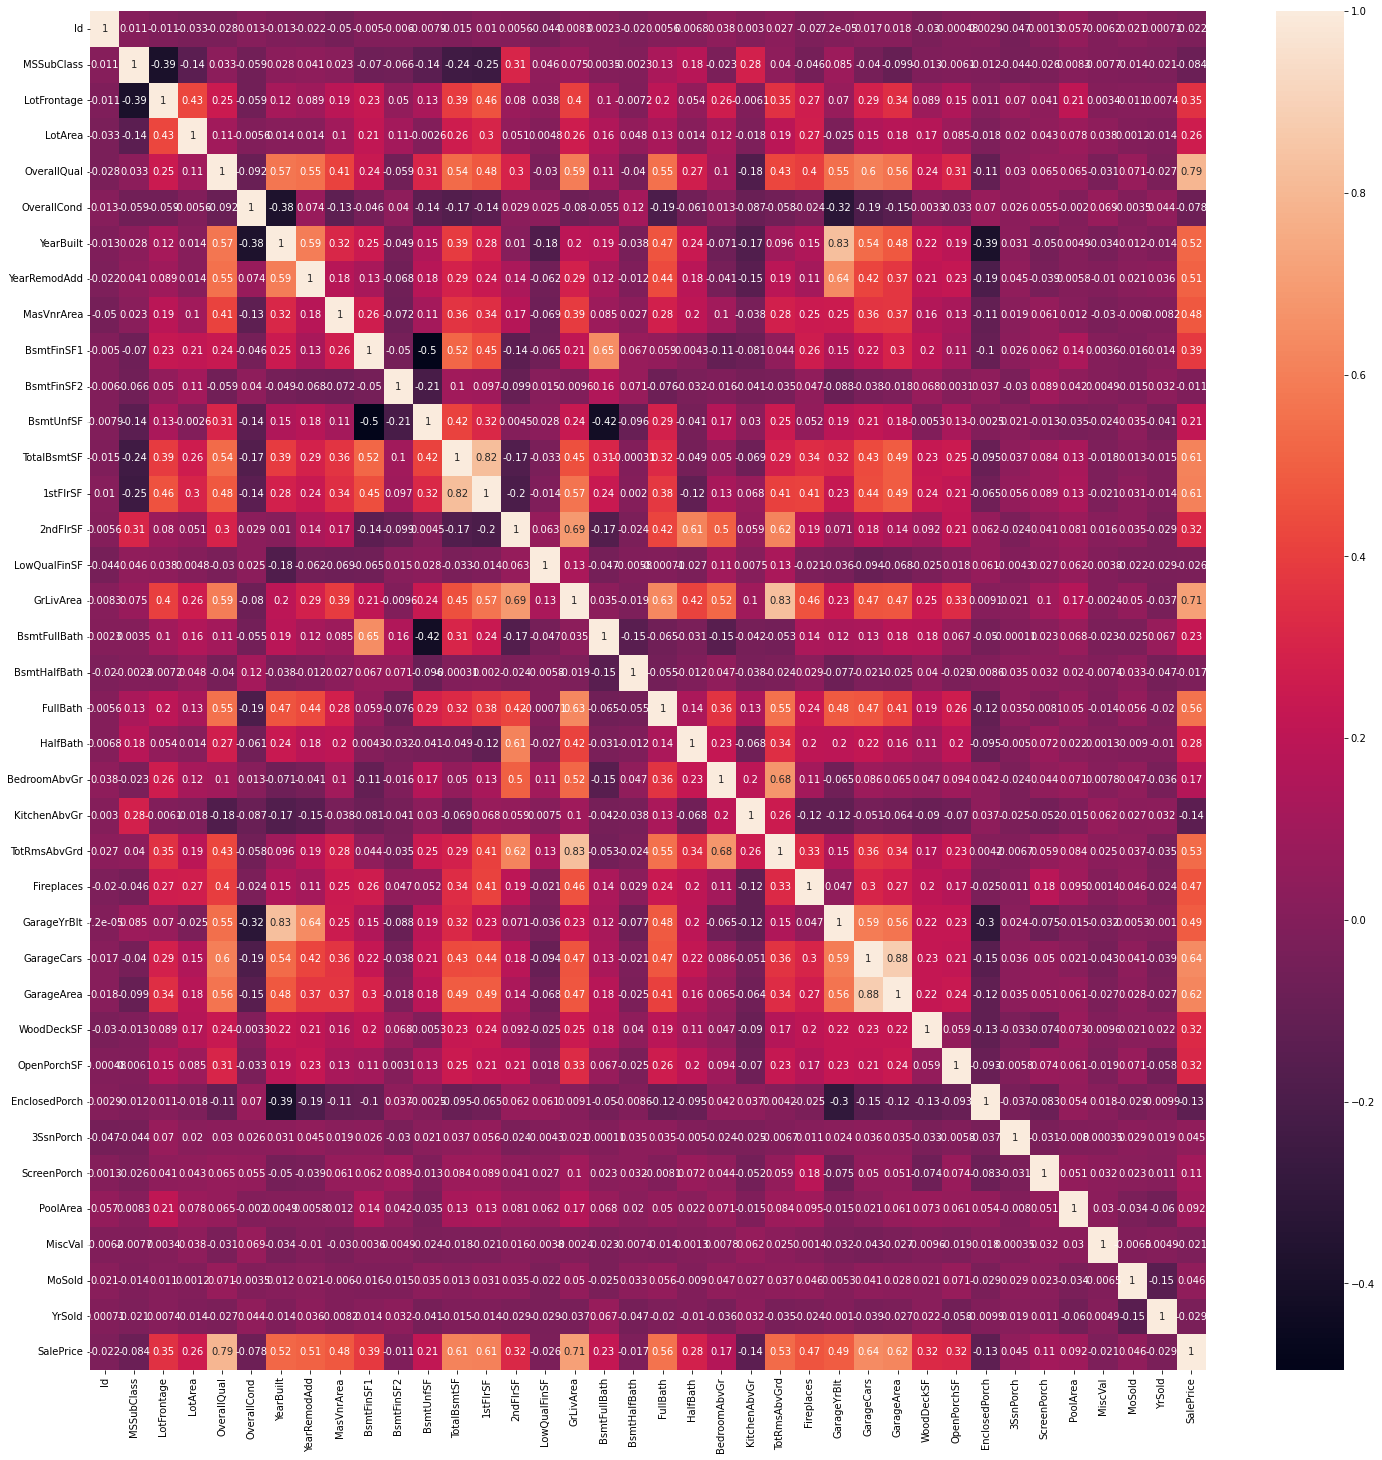

In [12]:
plt.figure(figsize=(25, 25))
sns.heatmap(train_set[numerical_features].corr(), annot=True)
plt.show()

In [13]:
# check correlation between features and target variable

target_corr = train_set[numerical_features].corr()['SalePrice'].sort_values(ascending=False)
target_corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [14]:
# remove some correlated and transform numerical fatures

train_set.drop(['Id', 'GarageYrBlt', 'GarageArea', '1stFlrSF'], axis=1, inplace=True)
test_set.drop(['Id', 'GarageYrBlt', 'GarageArea', '1stFlrSF'], axis=1, inplace=True)

/home/thenielfarias/.local/share/virtualenvs/thenielfarias-orcZKmpx/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


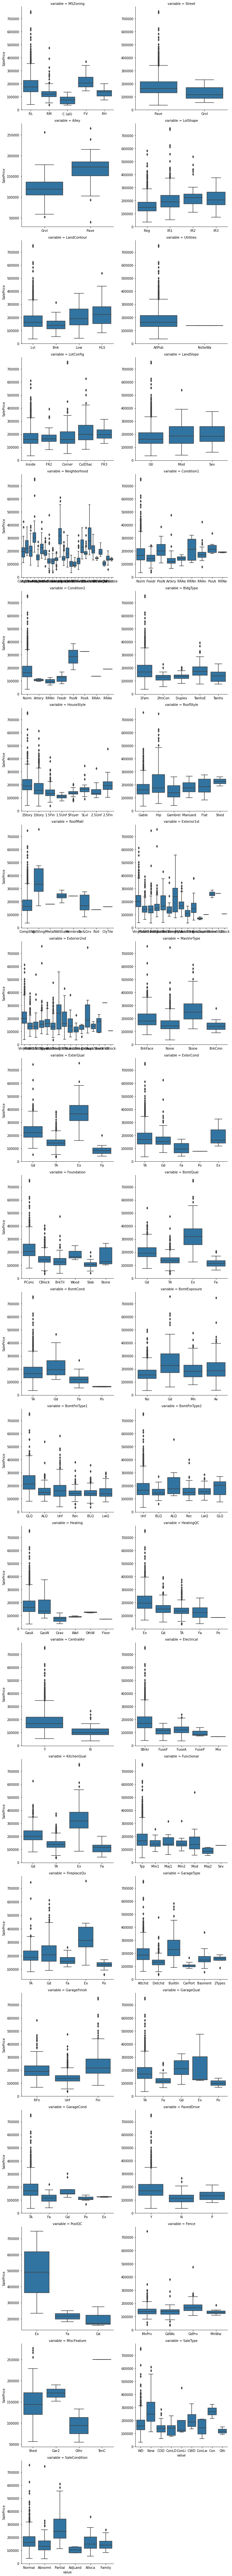

In [15]:
cat_target = pd.melt(train_set, id_vars = 'SalePrice', value_vars = categorical_features)

g = sns.FacetGrid(cat_target, col='variable', col_wrap=2, sharex=False, sharey=False, height=5, palette='tab10')
g = g.map(sns.boxplot, 'value', 'SalePrice')

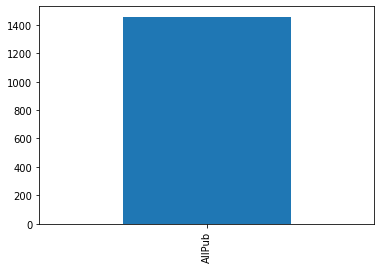

In [16]:
test_set['Utilities'].value_counts().plot.bar()
plt.show()

In [17]:
train_set.drop('Utilities', axis=1, inplace=True)
test_set.drop('Utilities', axis=1, inplace=True)

In [18]:
# handling missing categorical variables with 'None'

categorical_features.remove('Utilities')
train_set[categorical_features] = train_set[categorical_features].fillna("NoNe")
test_set[categorical_features] = test_set[categorical_features].fillna("NoNe")

In [19]:
# handling outliers

def outlier_detector(data, col_name):
    upper_lim = data[col_name].quantile(.95)
    lower_lim = data[col_name].quantile(.05)
    data = data[(data[col_name] < lower_lim) & (data[col_name] > upper_lim)][col_name]
    if len(data) > 0:
        return True
    return False

def handle_numerical(data, col_name):
    if outlier_detector(data, col_name):
        data[col_name].fillna(data[col_name].mean(), inplace=True)
    else:
        data[col_name].fillna(data[col_name].median(), inplace=True)
        
handle_numerical(train_set, 'LotFrontage')
handle_numerical(train_set, 'MasVnrArea')
handle_numerical(test_set, 'LotFrontage')
handle_numerical(test_set, 'MasVnrArea')

In [20]:
# genereting some features interactions

train_set['AboveGr'] = (train_set['FullBath'] + train_set['BedroomAbvGr'] + train_set['KitchenAbvGr'] + train_set['HalfBath']) / train_set['GrLivArea']
test_set['AboveGr'] = (test_set['FullBath'] + test_set['BedroomAbvGr'] + test_set['KitchenAbvGr'] + test_set['HalfBath']) / test_set['GrLivArea']

# add polynomial features for the top 5 correlated features ^2, ^1/2, ^3

train_set['PoolArea^2'] = train_set['PoolArea']**2
train_set['PoolArea^3'] = train_set['PoolArea']**3
train_set['PoolArea^1/2'] = np.sqrt(train_set['PoolArea'])
test_set['PoolArea^2'] = test_set['PoolArea']**2
test_set['PoolArea^3'] = test_set['PoolArea']**3
test_set['PoolArea^1/2'] = np.sqrt(test_set['PoolArea'])
 
train_set['MoSold^2'] = train_set['MoSold']**2
train_set['MoSold^3'] = train_set['MoSold']**3
train_set['MoSold^1/2'] = np.sqrt(train_set['MoSold'])
test_set['MoSold^2'] = test_set['MoSold']**2
test_set['MoSold^3'] = test_set['MoSold']**3
test_set['MoSold^1/2'] = np.sqrt(test_set['MoSold'])
 
train_set['3SsnPorch^2'] = train_set['3SsnPorch']**2
train_set['3SsnPorch^3'] = train_set['3SsnPorch']**3
train_set['3SsnPorch^1/2'] = np.sqrt(train_set['3SsnPorch'])
test_set['3SsnPorch^2'] = test_set['3SsnPorch']**2
test_set['3SsnPorch^3'] = test_set['3SsnPorch']**3
test_set['3SsnPorch^1/2'] = np.sqrt(test_set['3SsnPorch'])
 
train_set['BsmtFinSF2^2'] = train_set['BsmtFinSF2']**2
train_set['BsmtFinSF2^3'] = train_set['BsmtFinSF2']**3
train_set['BsmtFinSF2^1/2'] = np.sqrt(train_set['BsmtFinSF2'])
test_set['BsmtFinSF2^2'] = test_set['BsmtFinSF2']**2
test_set['BsmtFinSF2^3'] = test_set['BsmtFinSF2']**3
test_set['BsmtFinSF2^1/2'] = np.sqrt(test_set['BsmtFinSF2'])
 
train_set['BsmtHalfBath^2'] = train_set['BsmtHalfBath']**2
train_set['BsmtHalfBath^3'] = train_set['BsmtHalfBath']**3
train_set['BsmtHalfBath^1/2'] = np.sqrt(train_set['BsmtHalfBath'])
test_set['BsmtHalfBath^2'] = test_set['BsmtHalfBath']**2
test_set['BsmtHalfBath^3'] = test_set['BsmtHalfBath']**3
test_set['BsmtHalfBath^1/2'] = np.sqrt(test_set['BsmtHalfBath'])
 
train_set['MiscVal^2'] = train_set['MiscVal']**2
train_set['MiscVal^3'] = train_set['MiscVal']**3
train_set['MiscVal^1/2'] = np.sqrt(train_set['MiscVal'])
test_set['MiscVal^2'] = test_set['MiscVal']**2
test_set['MiscVal^3'] = test_set['MiscVal']**3
test_set['MiscVal^1/2'] = np.sqrt(test_set['MiscVal'])
 
train_set['LowQualFinSF^2'] = train_set['LowQualFinSF']**2
train_set['LowQualFinSF^3'] = train_set['LowQualFinSF']**3
train_set['LowQualFinSF^1/2'] = np.sqrt(train_set['LowQualFinSF'])
test_set['LowQualFinSF^2'] = test_set['LowQualFinSF']**2
test_set['LowQualFinSF^3'] = test_set['LowQualFinSF']**3
test_set['LowQualFinSF^1/2'] = np.sqrt(test_set['LowQualFinSF'])

In [21]:
# check the skewness of the numeric features for log transformation

numerical_features = [col for col in train_set.columns if train_set[col].dtype != 'object']
numerical_features.remove('SalePrice')
categorical_features = [col for col in train_set.columns if train_set[col].dtype == 'object']
skewed_features = [col for col in train_set[numerical_features].columns if train_set[col].skew() > 0.5]
print(len(skewed_features))

45


In [22]:
for col in test_set[numerical_features].columns:
    handle_numerical(test_set, col)

In [23]:
y = train_set['SalePrice']
X = train_set.drop('SalePrice', axis = 1)
y = y.apply(lambda x: np.log1p(x))
X[skewed_features] = X[skewed_features].apply(lambda x: np.log1p(x))
test_set[skewed_features] = test_set[skewed_features].apply(lambda x: np.log1p(x))

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder

all_num_data = pd.concat([X[numerical_features], test_set[numerical_features]])

ss = StandardScaler()

ss.fit(all_num_data)
normalized_X = pd.DataFrame(ss.transform(X[numerical_features]))
normalized_test = pd.DataFrame(ss.transform(test_set[numerical_features]))
normalized_X.index = X.index
normalized_test.index = test_set.index

In [25]:
# check high and low cardinality columns

good_label_cols = [i for i in categorical_features if set(X[i]) == set(test_set[i])]
bad_label_cols = list(set(categorical_features) - set(good_label_cols))
print('good label cols \n', good_label_cols)
print('bad label cols \n', bad_label_cols)

good label cols 
 ['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'Fence', 'SaleCondition']
bad label cols 
 ['KitchenQual', 'Electrical', 'HouseStyle', 'Functional', 'Exterior2nd', 'PoolQC', 'GarageQual', 'Condition2', 'Exterior1st', 'Heating', 'SaleType', 'MSZoning', 'RoofMatl', 'MiscFeature']


In [26]:
good_cat_x = X[good_label_cols]
bad_cat_x = X[bad_label_cols]
good_cat_test = test_set[good_label_cols]
bad_cat_test = test_set[bad_label_cols]

In [27]:
all_cat_data = pd.concat([X[categorical_features], test_set[categorical_features]])

ord_enc = OrdinalEncoder()

ord_enc.fit(all_cat_data[good_label_cols])
good_cat_x = pd.DataFrame(ord_enc.transform(good_cat_x)) 
good_cat_test=pd.DataFrame(ord_enc.transform(good_cat_test))
good_cat_x.index = good_cat_x.index
good_cat_test.index = good_cat_test.index

In [28]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

ohe.fit(all_cat_data[bad_label_cols])
oh_cat_x = pd.DataFrame(ohe.transform(bad_cat_x))
oh_cat_test = pd.DataFrame(ohe.transform(bad_cat_test))
oh_cat_x.index = bad_cat_x.index
oh_cat_test.index = bad_cat_test.index

In [29]:
X = pd.concat([normalized_X,good_cat_x, oh_cat_x], axis=1)
test_set = pd.concat([normalized_test, good_cat_test, oh_cat_test], axis=1)

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

model=[
    {
        'name': 'Linear Regression',
        'estimator':LinearRegression(),
        'hyperparameters':{}
    },
    {
        'name':'Ridge Regression',
        'estimator':Ridge(),
        'hyperparameters':{
            'alpha':np.arange(0.01, 1, 0.02)
        }
    },
    {
        'name':'Lasso Regression',
        'estimator':Lasso(),
        'hyperparameters':{
            'alpha':np.arange(0.01, 1, 0.02)
        }
    },
    {
        'name': 'ElasticNet',
        'estimator': ElasticNet(),
        'hyperparameters':{
            'alpha':np.arange(0.01, 1, 0.02),
            'l1_ratio': [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1] 
        }
    },
    {
        'name':'Decision Tree',
        'estimator':DecisionTreeRegressor(),
        'hyperparameters':{
            'max_depth':[2,3,4,5,6,7],
            'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
            'splitter':['best', 'random'],
            'max_features':['auto', 'sqrt', 'log2']
        }
    },
    {
        'name':'Random Forest',
        'estimator':RandomForestRegressor(),
        'hyperparameters':{
            'n_estimators':[25, 50, 100, 150, 200],
            'max_depth':[2,3,4,5,6,7],
            'max_features':['auto', 'sqrt', 'log2']
        }
    }
]

for i in model:
    print(i['name'])
    gs=GridSearchCV(i['estimator'], param_grid=i['hyperparameters'], cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')
    gs.fit(X.values, y.values)
    print('best score: ', gs.best_score_)
    print('best parameters: ', gs.best_params_)
    print('best model: ', gs.best_estimator_)
    print('-----------------------------------------------\n')

Linear Regression
best score:  -1.6997145017680886
best parameters:  {}
best model:  LinearRegression()
-----------------------------------------------

Ridge Regression
best score:  -0.13417962253001045
best parameters:  {'alpha': 0.9899999999999999}
best model:  Ridge(alpha=0.9899999999999999)
-----------------------------------------------

Lasso Regression
best score:  -0.1386544062664675
best parameters:  {'alpha': 0.01}
best model:  Lasso(alpha=0.01)
-----------------------------------------------

ElasticNet
best score:  -0.13136535776438274
best parameters:  {'alpha': 0.01, 'l1_ratio': 0.1}
best model:  ElasticNet(alpha=0.01, l1_ratio=0.1)
-----------------------------------------------

Decision Tree
best score:  -0.19179391355840167
best parameters:  {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 'auto', 'splitter': 'best'}
best model:  DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      max_features='auto')
------------------

In [31]:
final_model = ElasticNet(alpha=0.01, l1_ratio=0.1)
final_model.fit(X, y)

ElasticNet(alpha=0.01, l1_ratio=0.1)

In [32]:
y_hat = np.expm1(final_model.predict(test_set))
y_hat

array([118059.20061607, 149648.33730794, 178272.17936457, ...,
       163287.06535153, 117906.8529565 , 240546.0731168 ])

In [33]:
results = pd.DataFrame({'Id':range(1461, 1461+len(test_set)), 'SalePrice':y_hat})

In [34]:
results

,Id,SalePrice
0,1461,118059.200616
1,1462,149648.337308
2,1463,178272.179365
3,1464,195974.972762
4,1465,190361.543735
...,...,...
1454,2915,88070.331028
1455,2916,82931.996646
1456,2917,163287.065352
1457,2918,117906.852956
